In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Task
Analyze the provided data to identify factors contributing to customer churn and build a predictive model.

## Inspect the data

### Subtask:
Check for missing values, data types, and unique values in each column.


**Reasoning**:
I will check for missing values, data types, and unique values in each column as requested.



In [3]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nData types per column:")
print(df.dtypes)

print("\nUnique values per column:")
for col in df.columns:
  print(f"{col}: {df[col].nunique()} unique values")

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data types per column:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     objec

## Clean the data

### Subtask:
Handle missing values and convert columns to appropriate data types if necessary.


**Reasoning**:
Based on the previous inspection, the 'TotalCharges' column is of object type but should be numerical. I will attempt to convert it to a numeric type, coercing errors to NaN, and then check for any resulting missing values.



In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Missing values after converting TotalCharges:")
print(df.isnull().sum())

Missing values after converting TotalCharges:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


**Reasoning**:
The previous step revealed 11 missing values in the 'TotalCharges' column after converting it to numeric. Since the number of missing values is small compared to the total number of rows, I will drop the rows with missing values in 'TotalCharges'.



In [5]:
df.dropna(subset=['TotalCharges'], inplace=True)
print("Missing values after dropping rows with missing TotalCharges:")
print(df.isnull().sum())
print("\nDataFrame info after handling missing values:")
df.info()

Missing values after dropping rows with missing TotalCharges:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

DataFrame info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-

## Analyze categorical features

### Subtask:
Visualize the distribution of categorical features and their relationship with churn.


**Reasoning**:
Identify the categorical columns and visualize their distributions and relationship with churn.



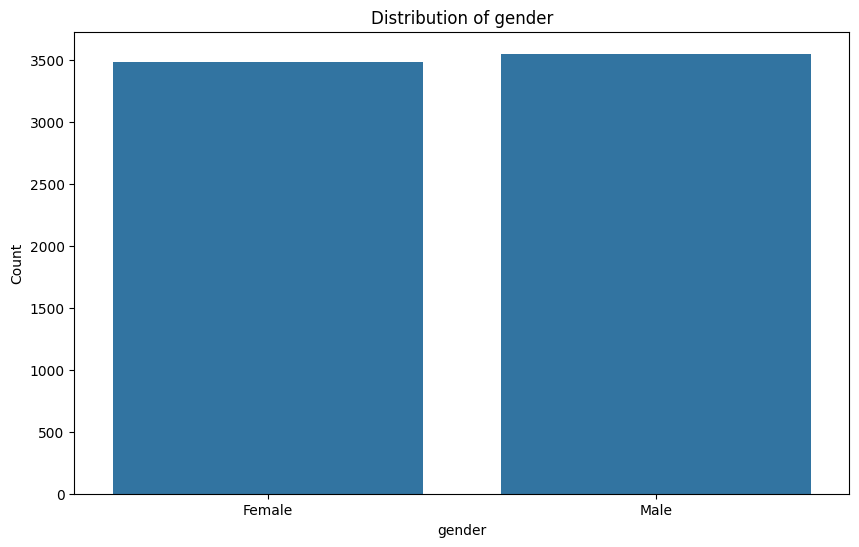

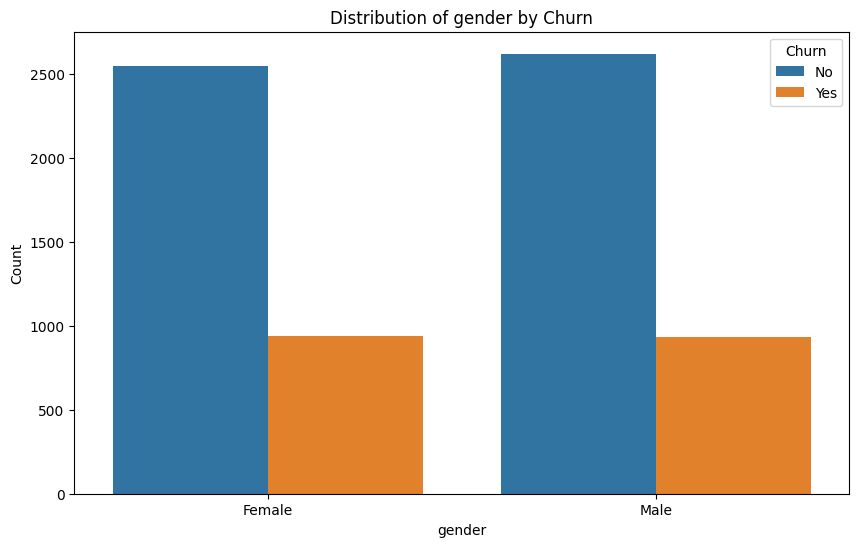

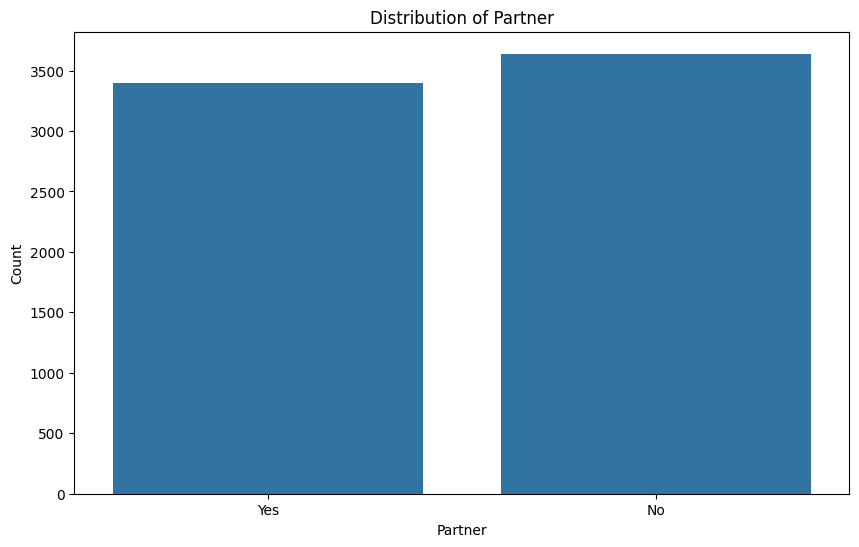

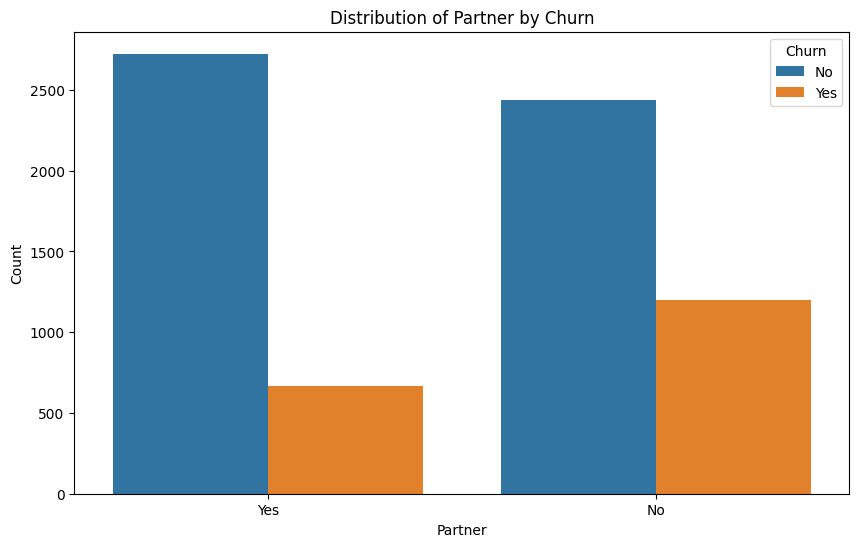

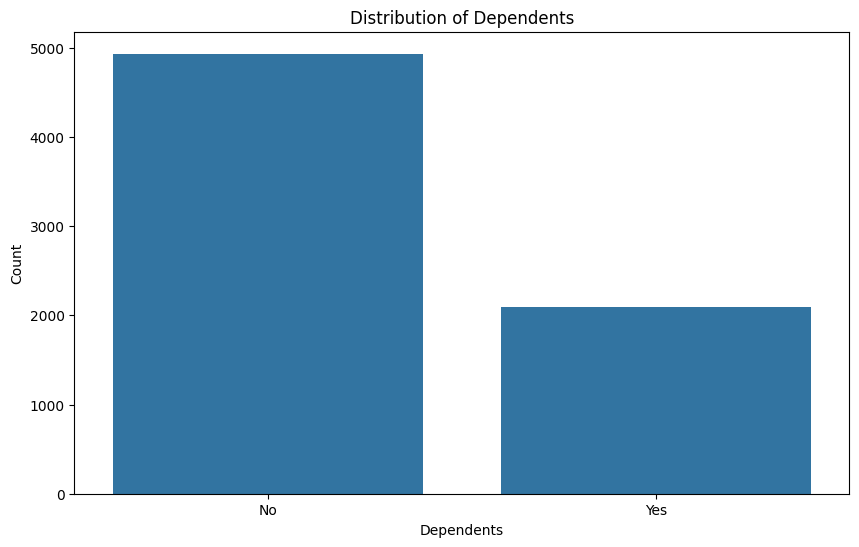

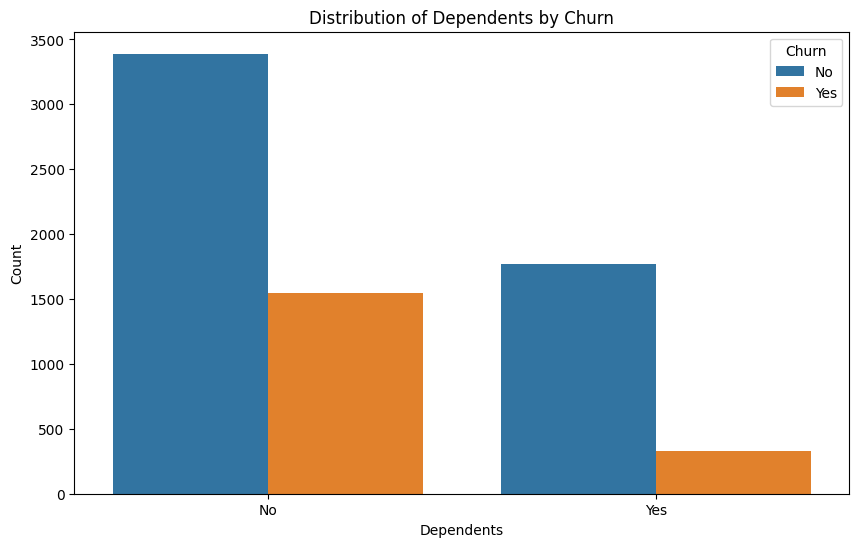

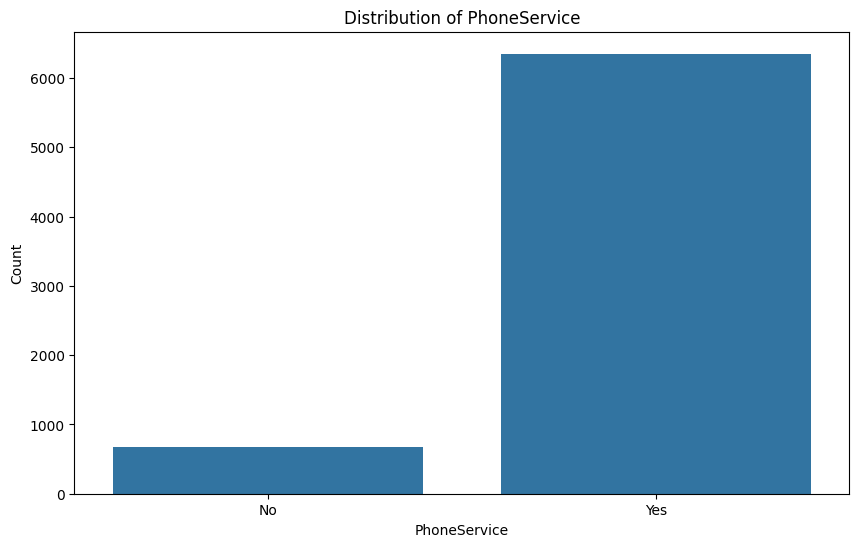

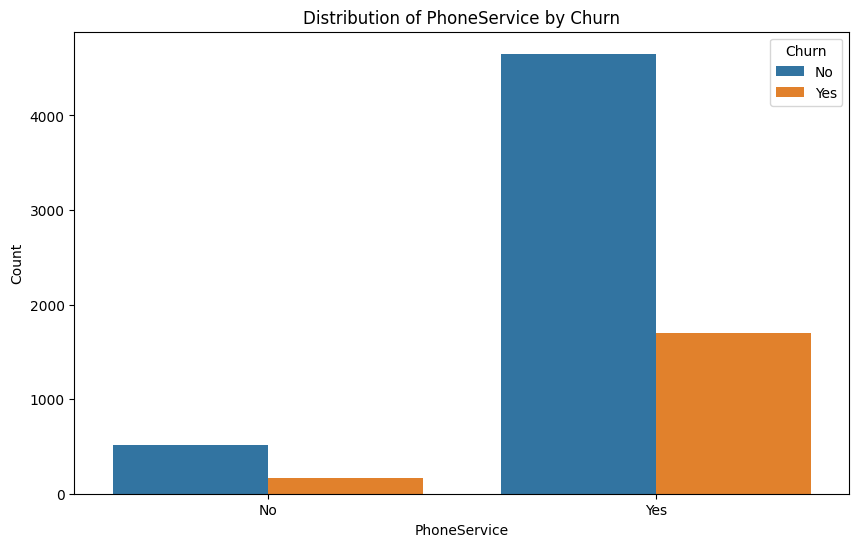

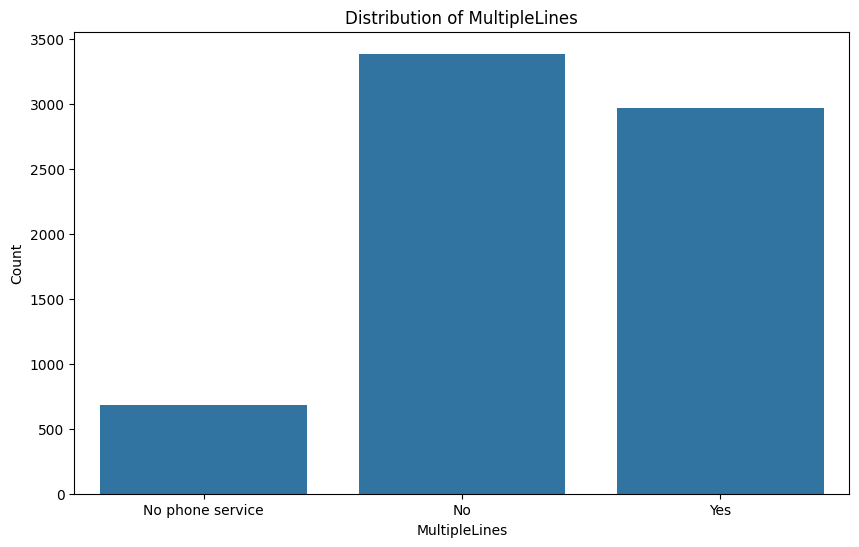

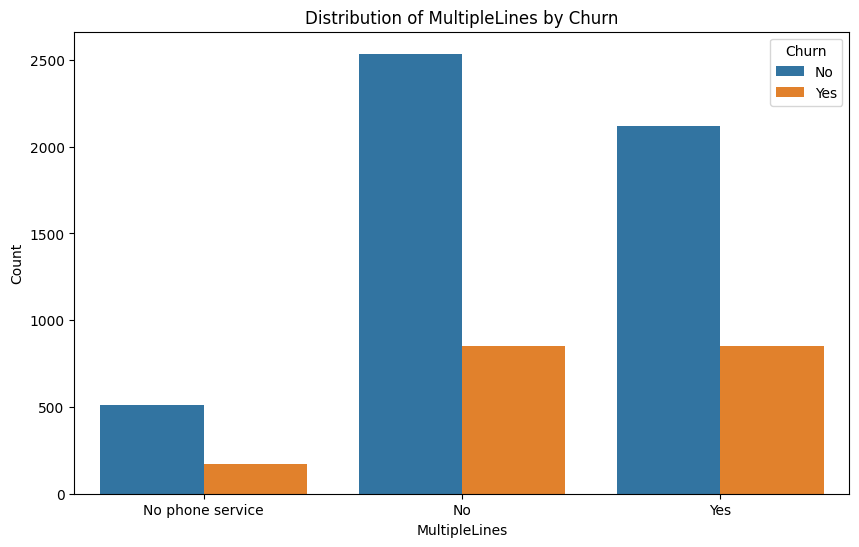

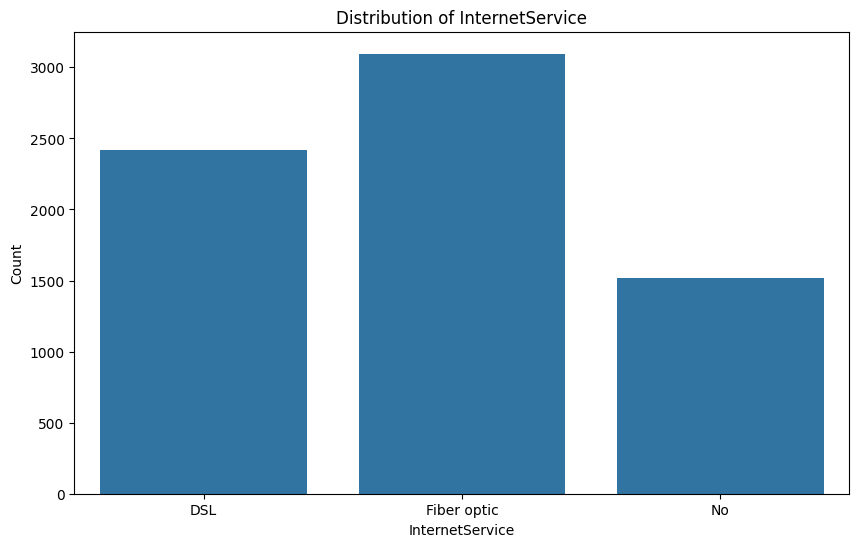

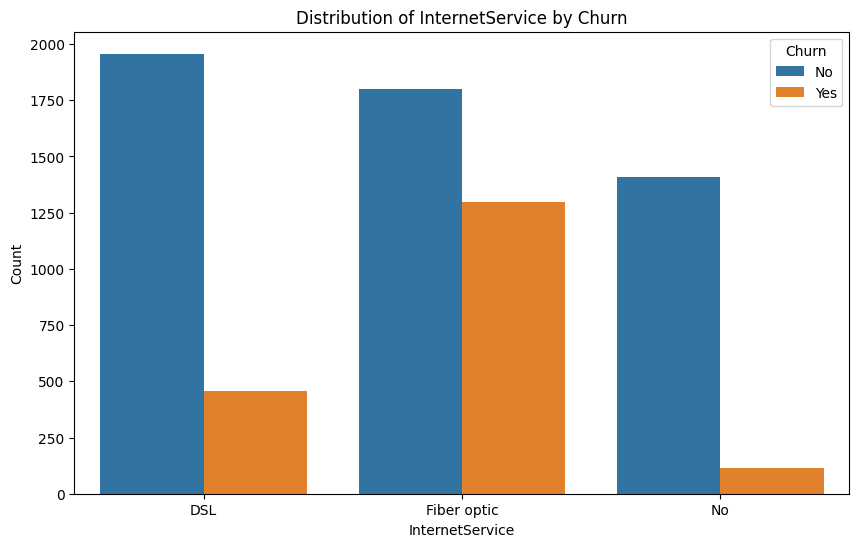

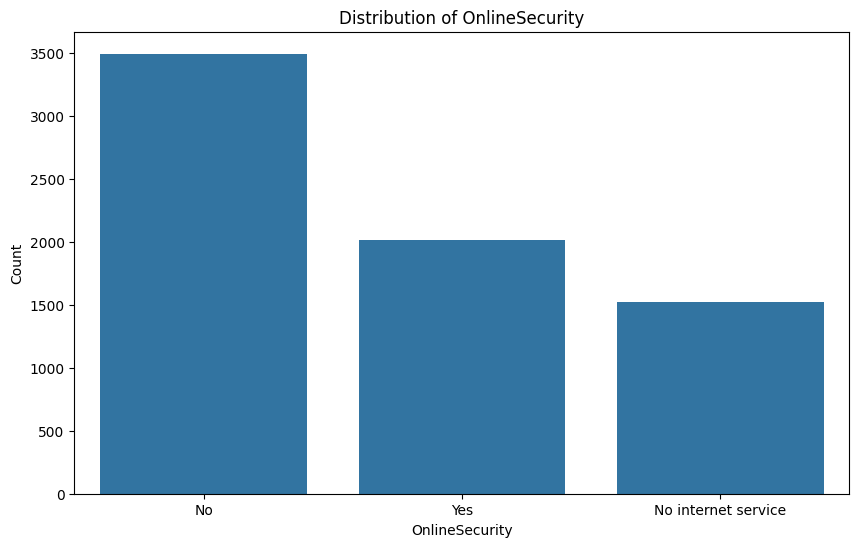

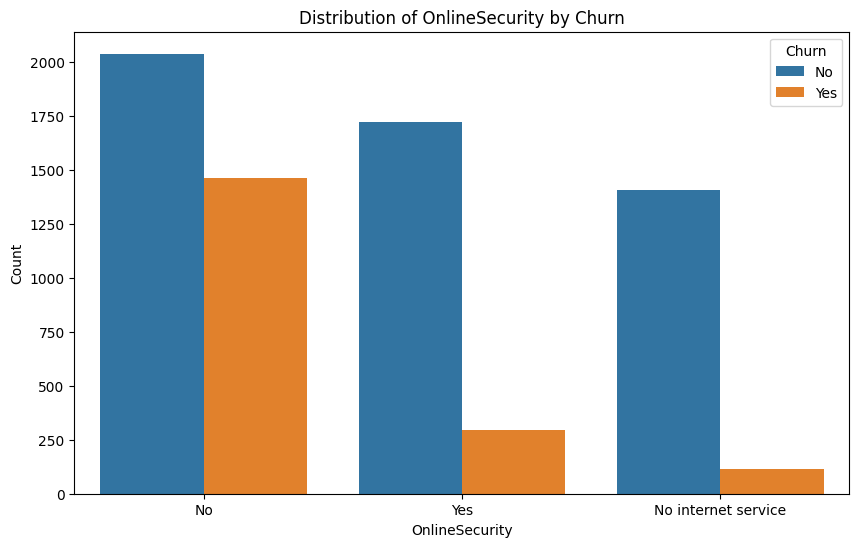

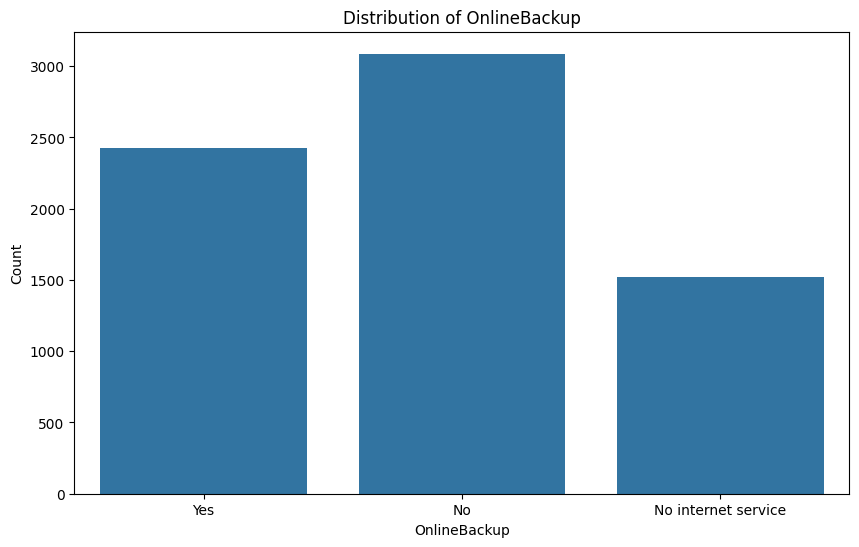

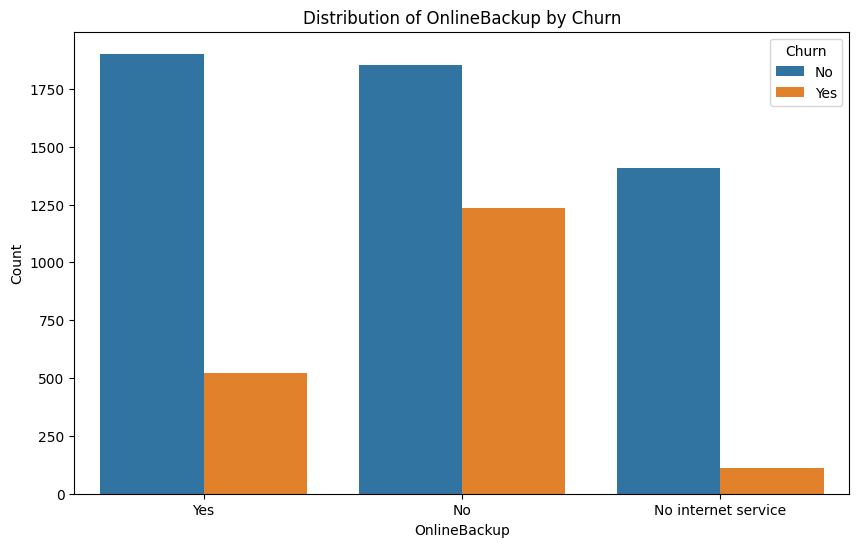

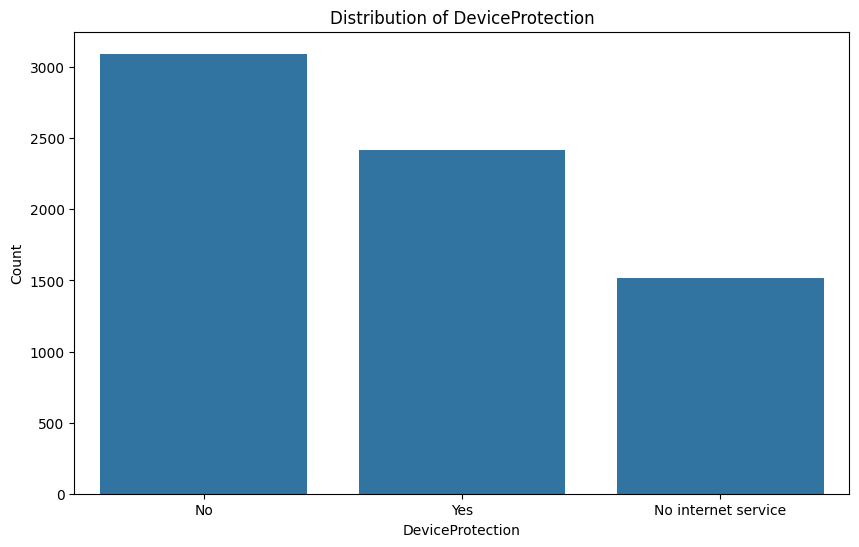

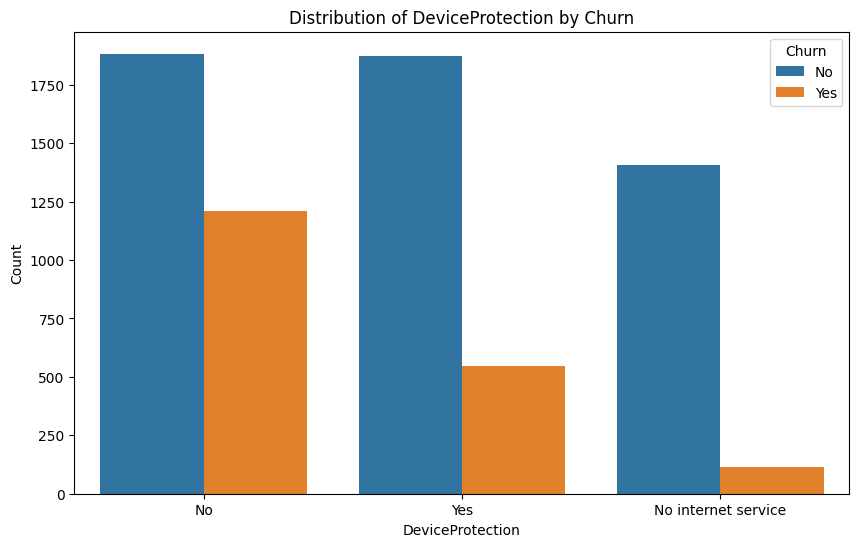

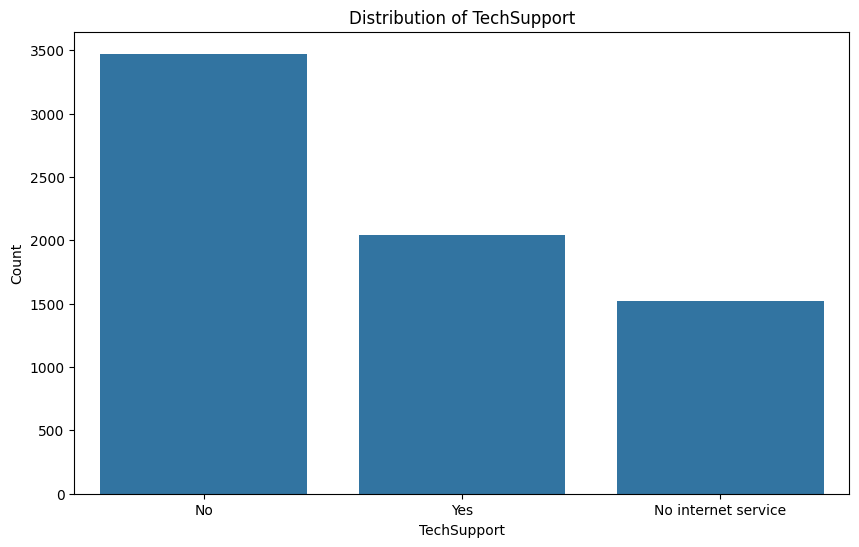

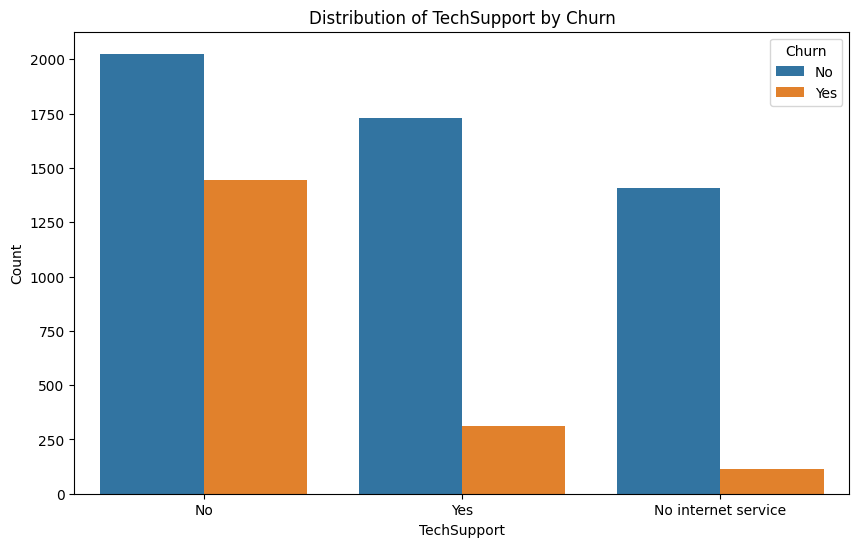

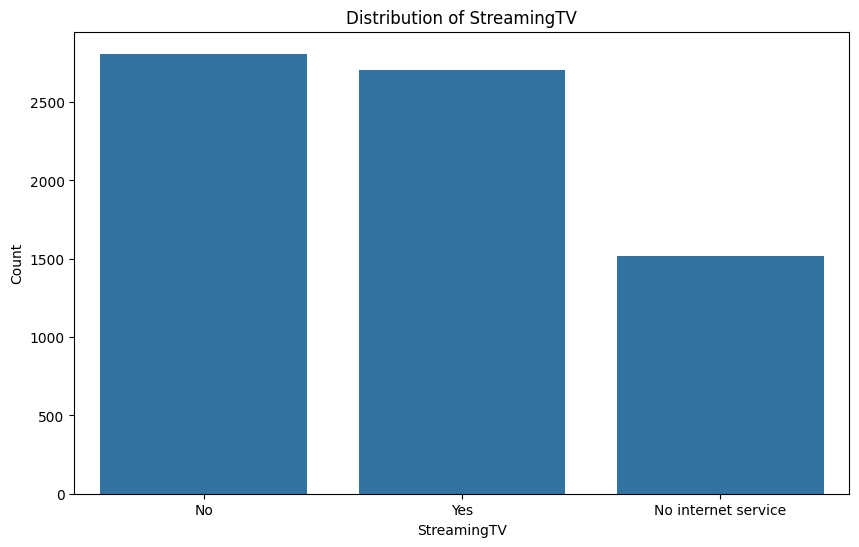

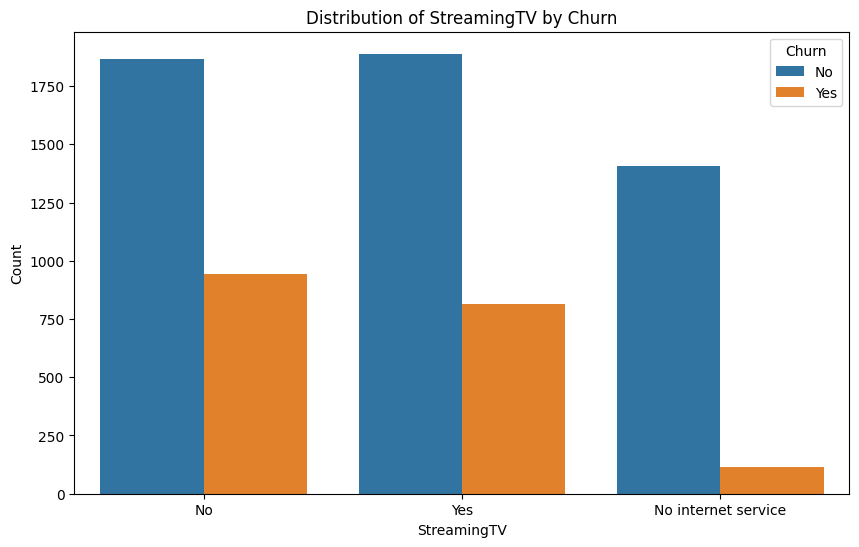

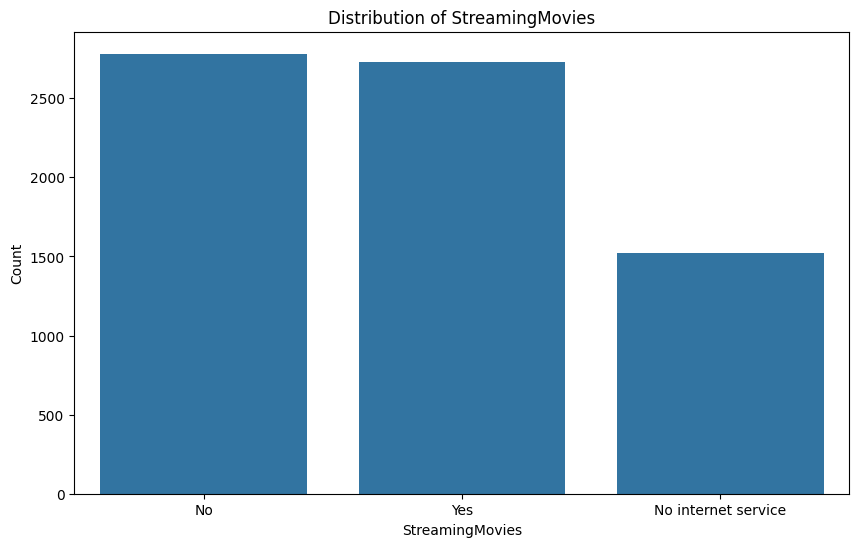

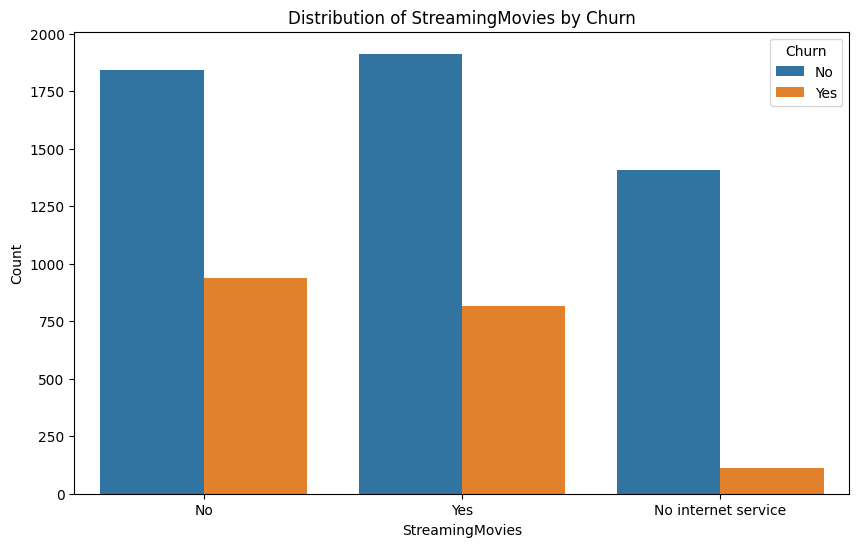

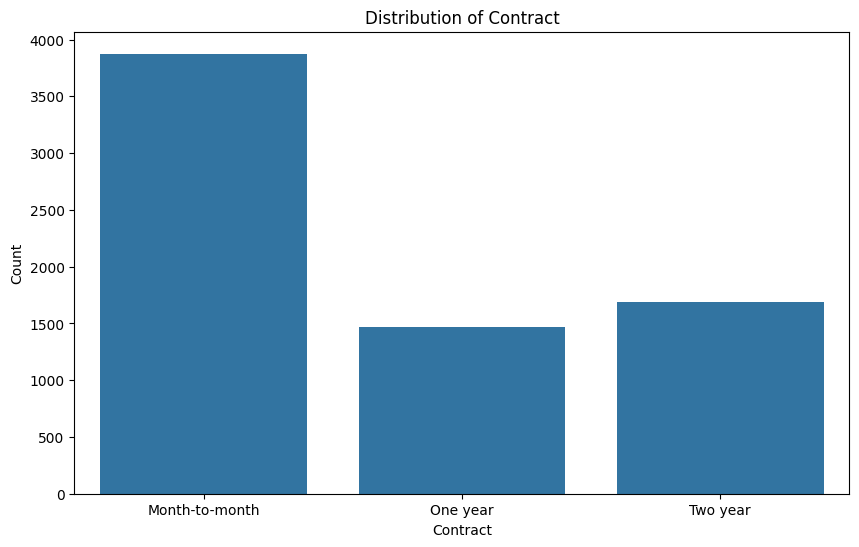

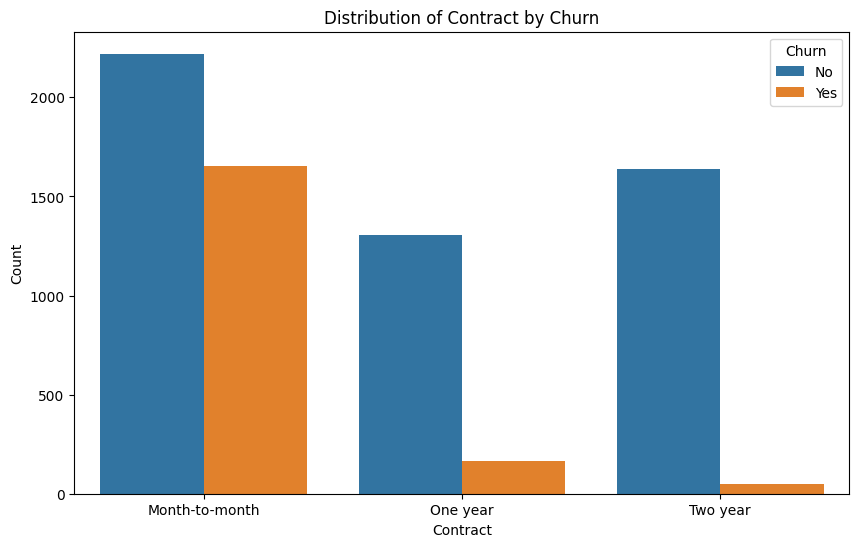

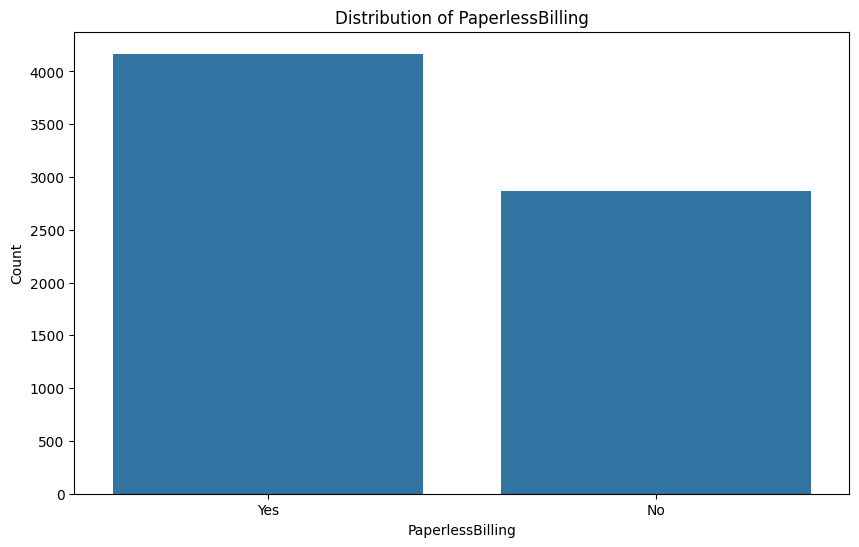

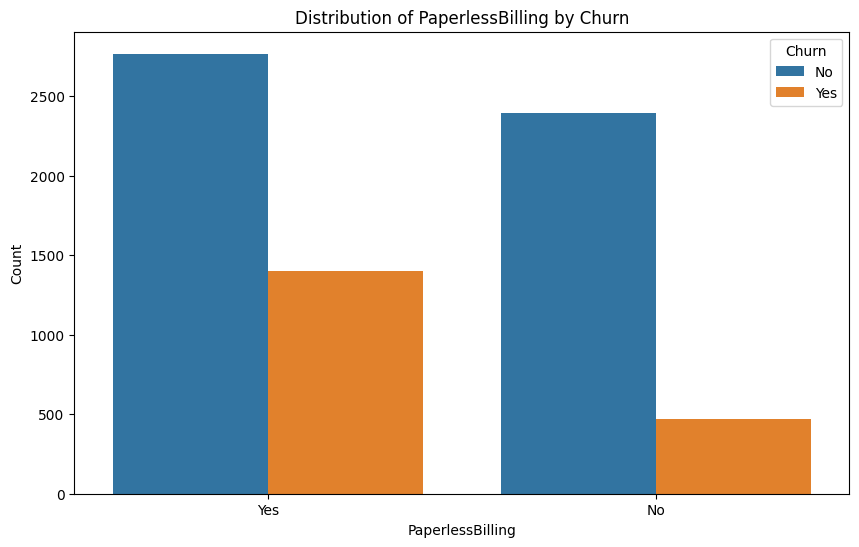

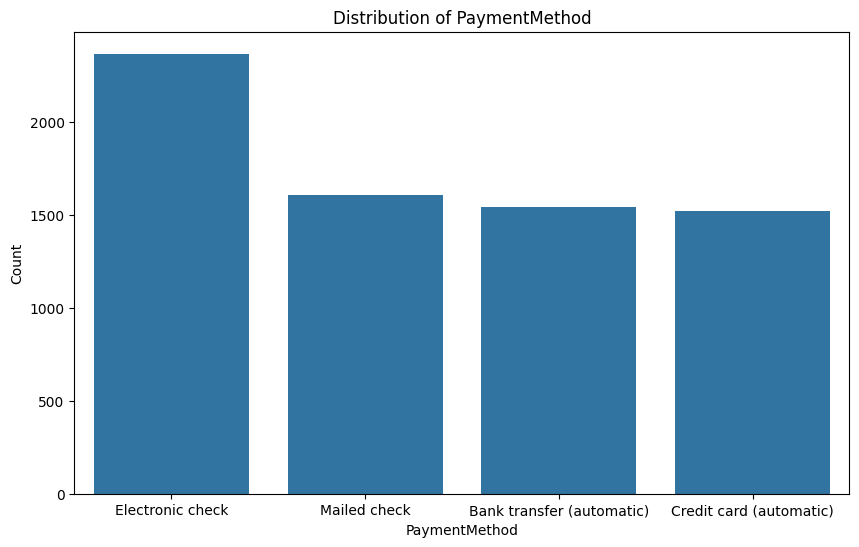

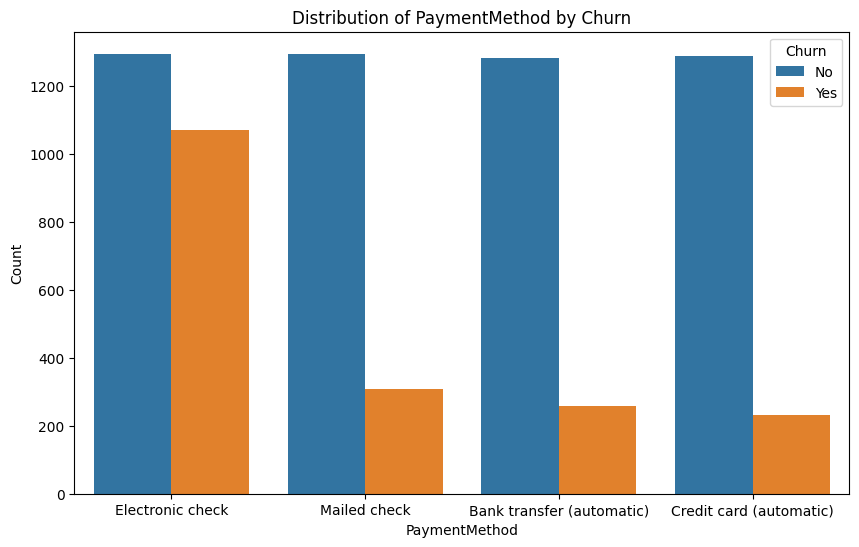

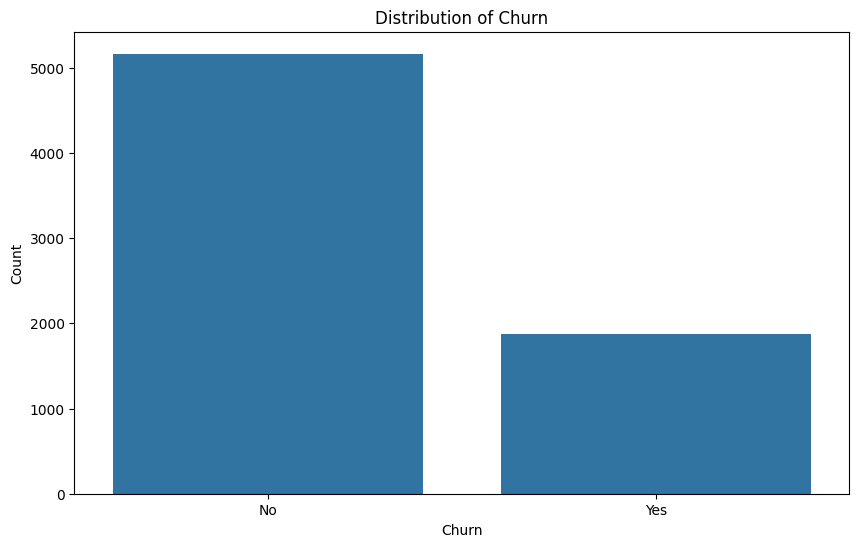

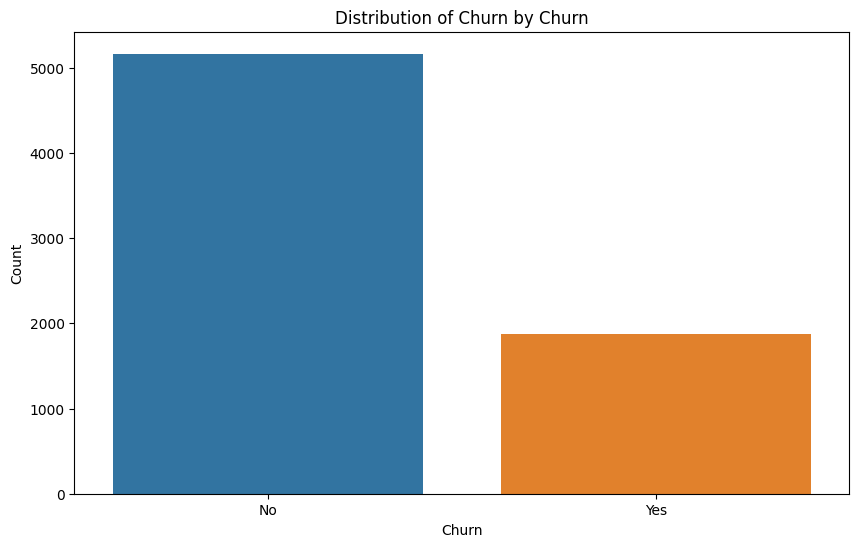

In [6]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'customerID']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Analyze numerical features

### Subtask:
Analyze the distribution of numerical features and their relationship with churn.


**Reasoning**:
Identify the numerical columns and create histograms and box plots for each, colored by Churn, to analyze their distribution and relationship with churn.



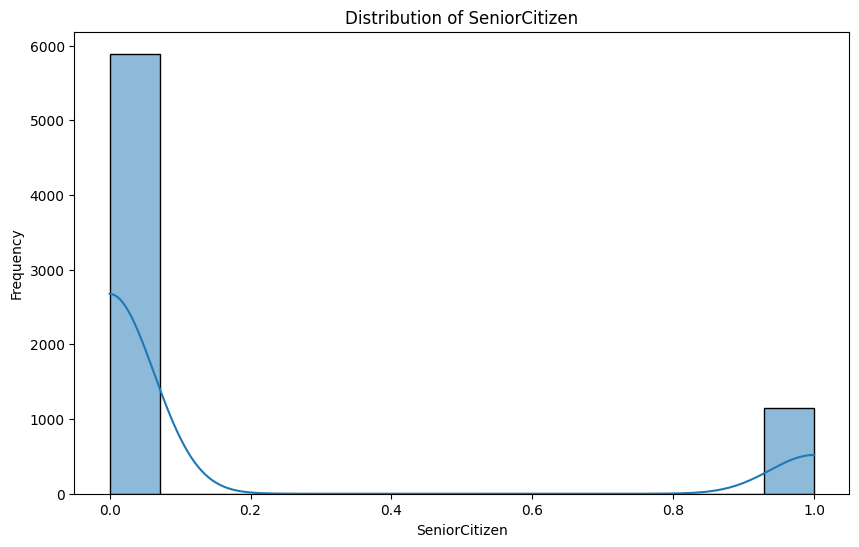

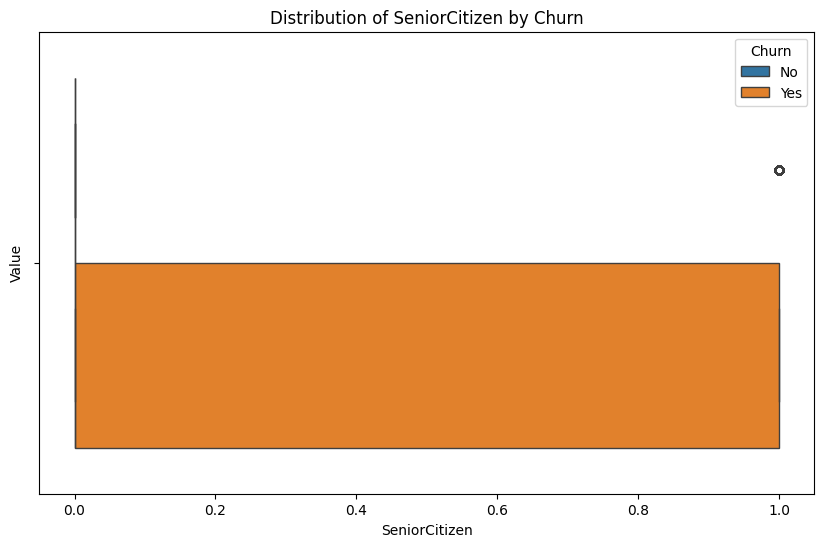

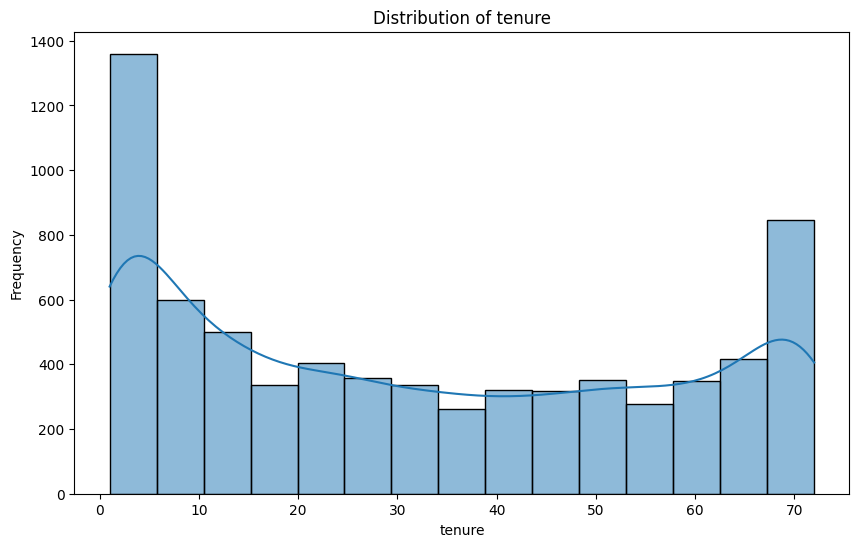

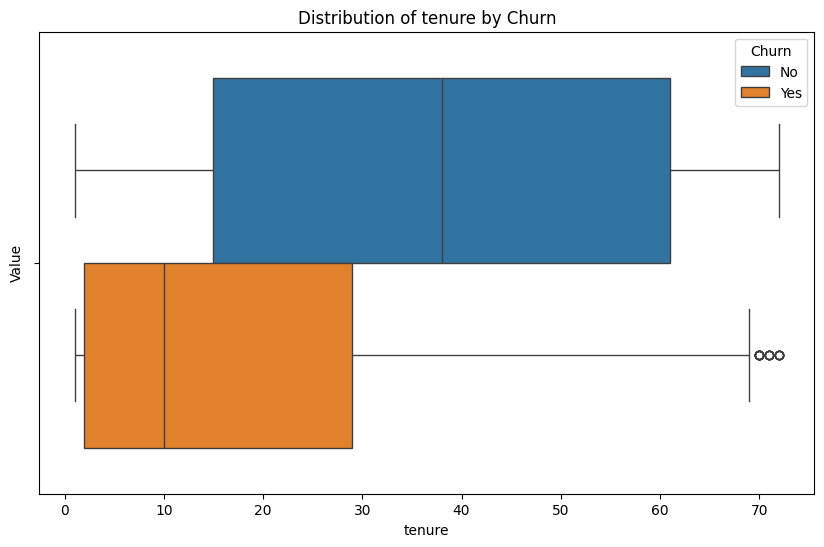

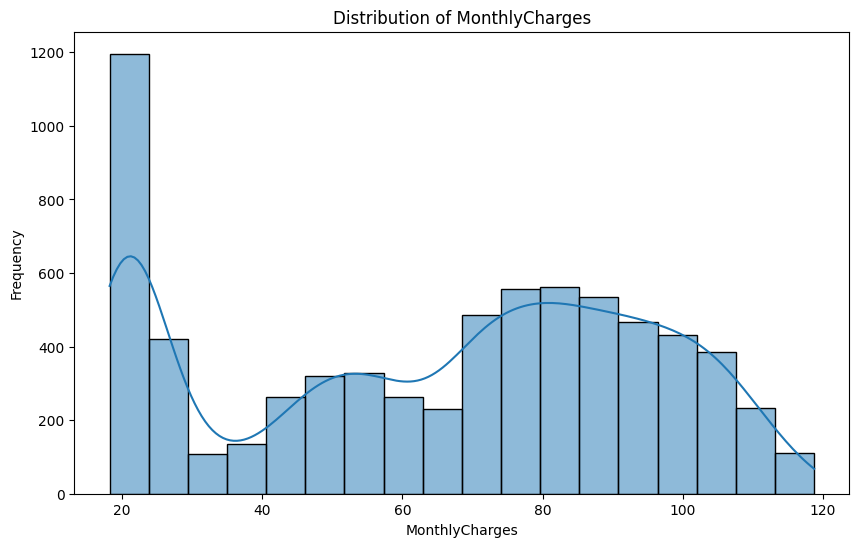

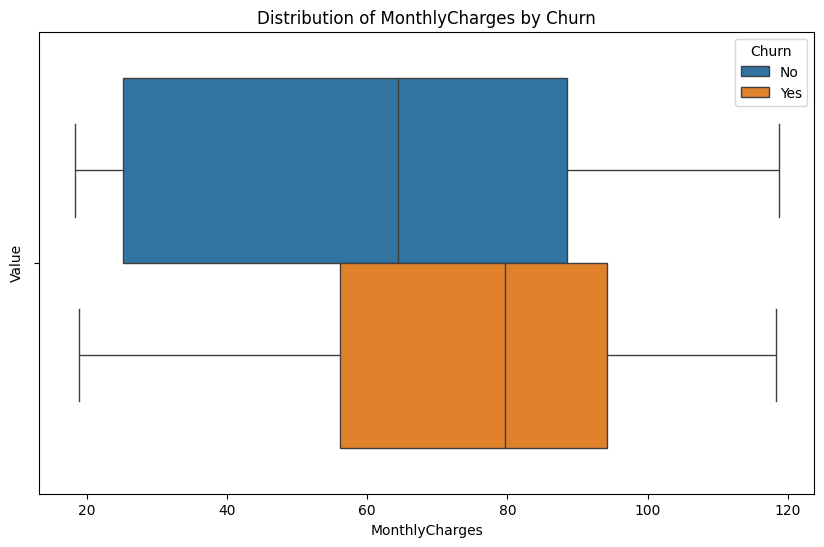

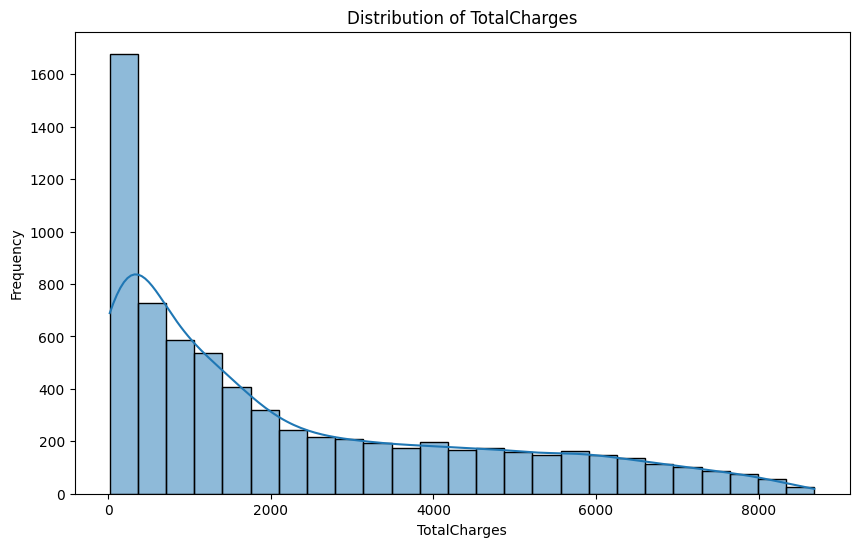

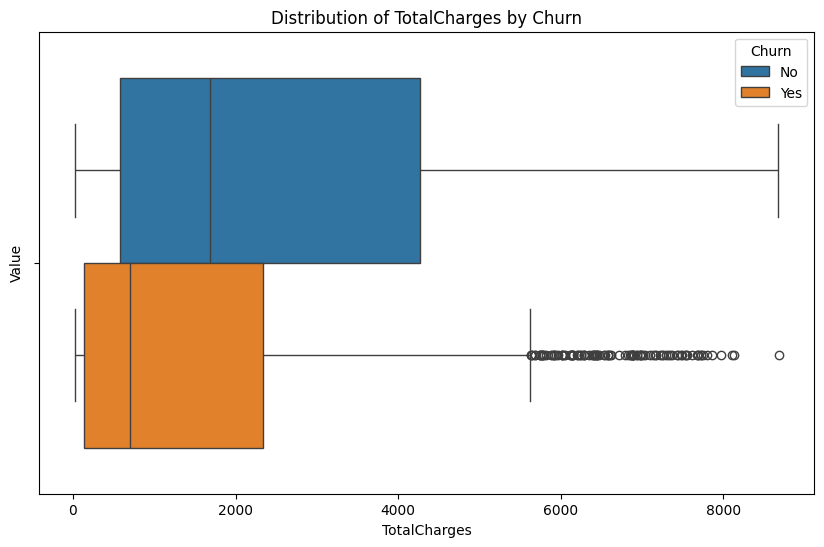

In [7]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()

## Explore relationships between features

### Subtask:
Investigate correlations and interactions between different features.


**Reasoning**:
Calculate the correlation matrix for numerical columns and create a heatmap to visualize it.



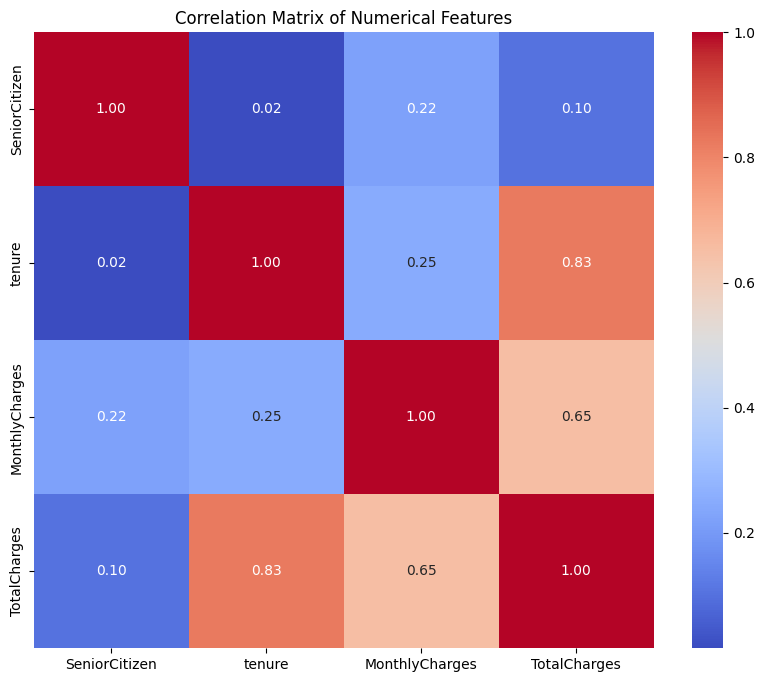

In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
Create box plots to visualize the interaction between selected categorical and numerical features and their relationship with churn.



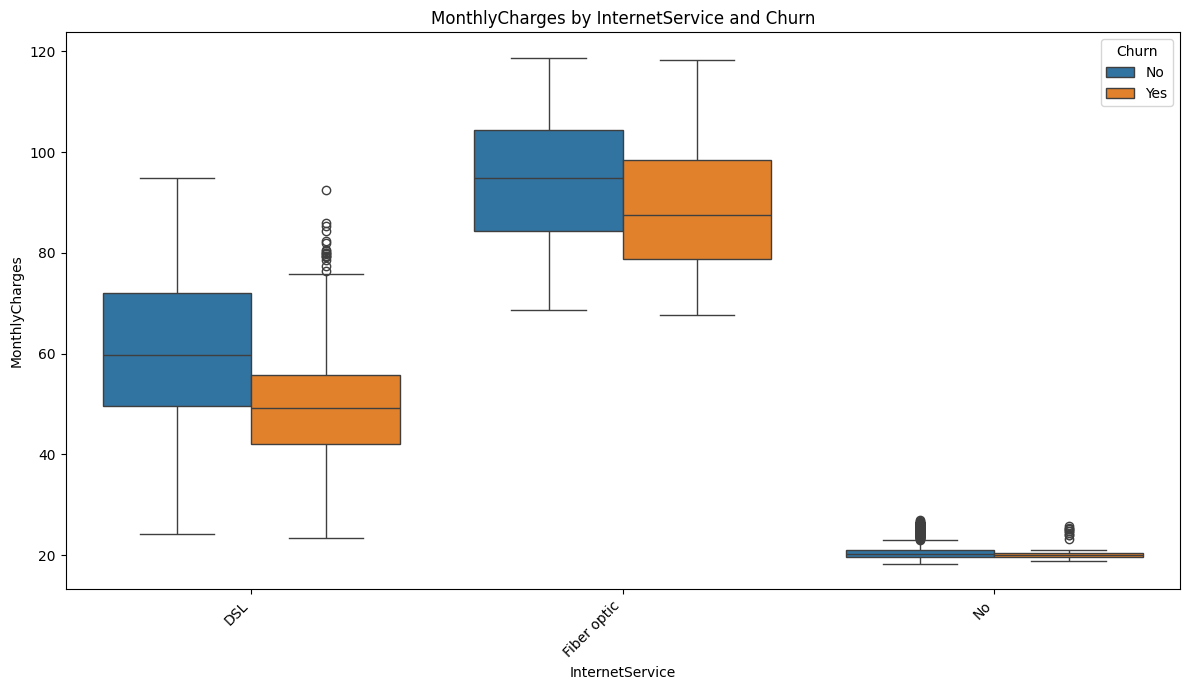

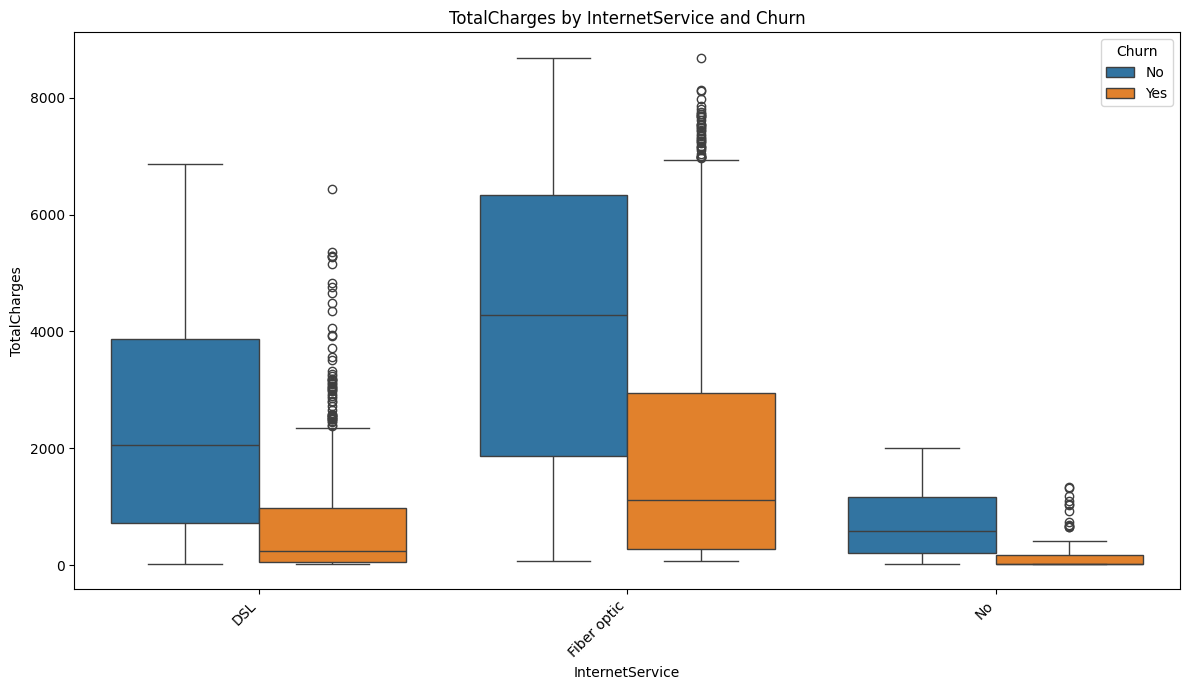

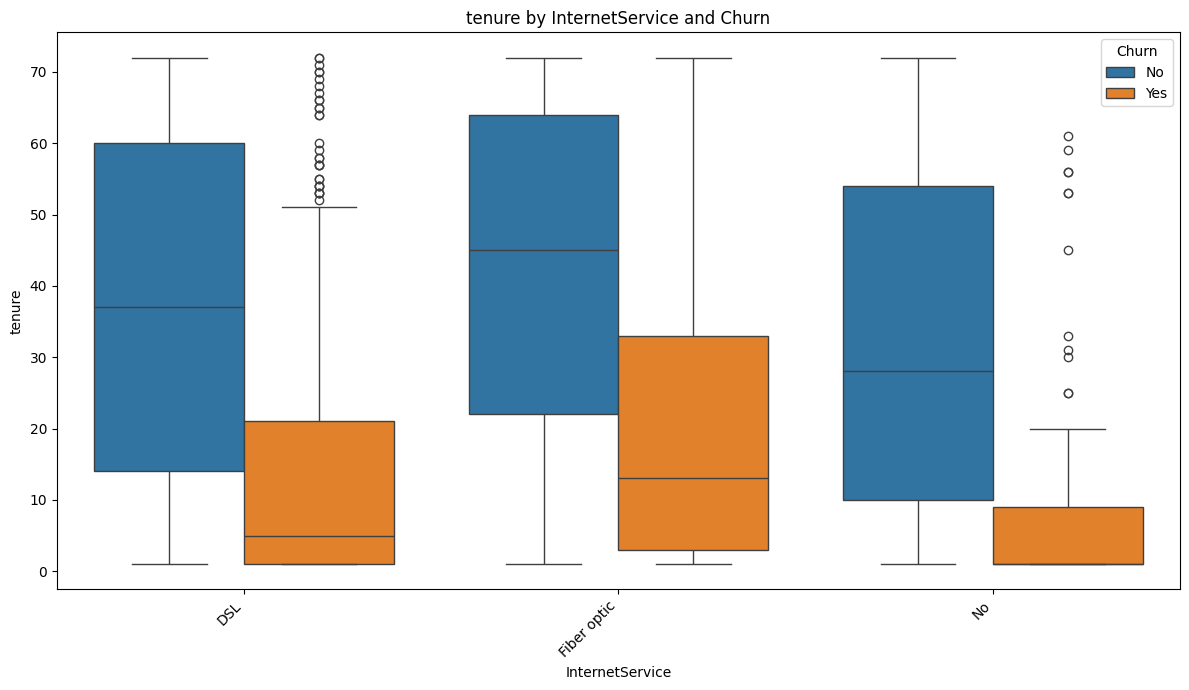

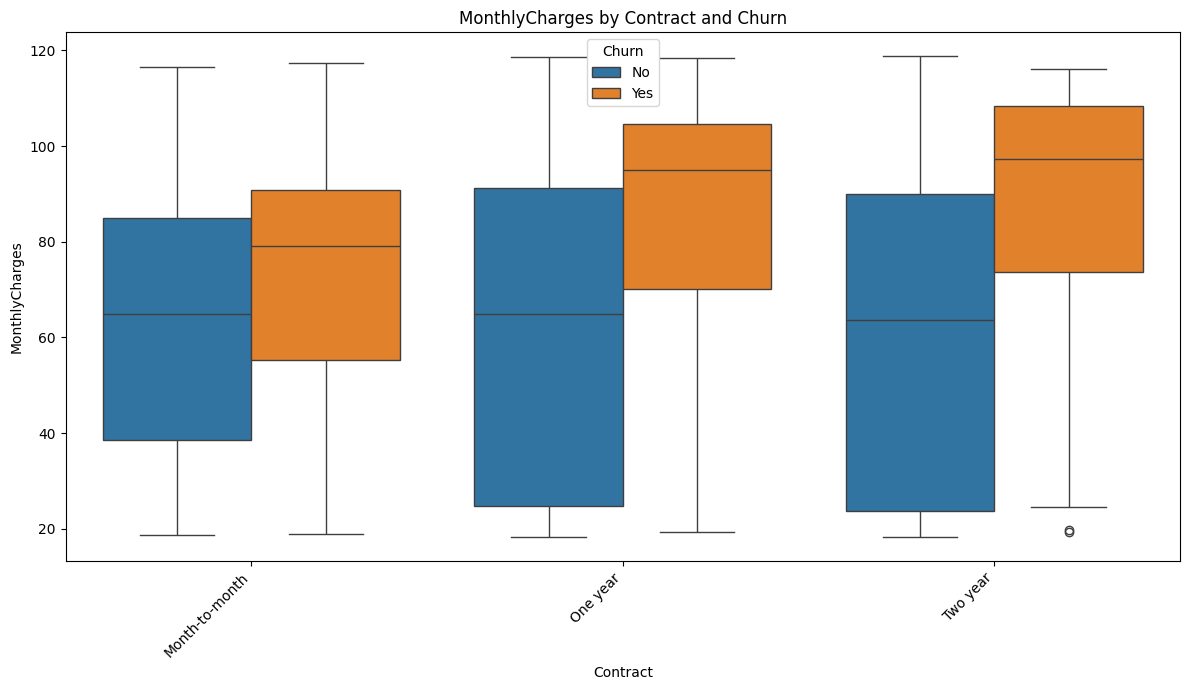

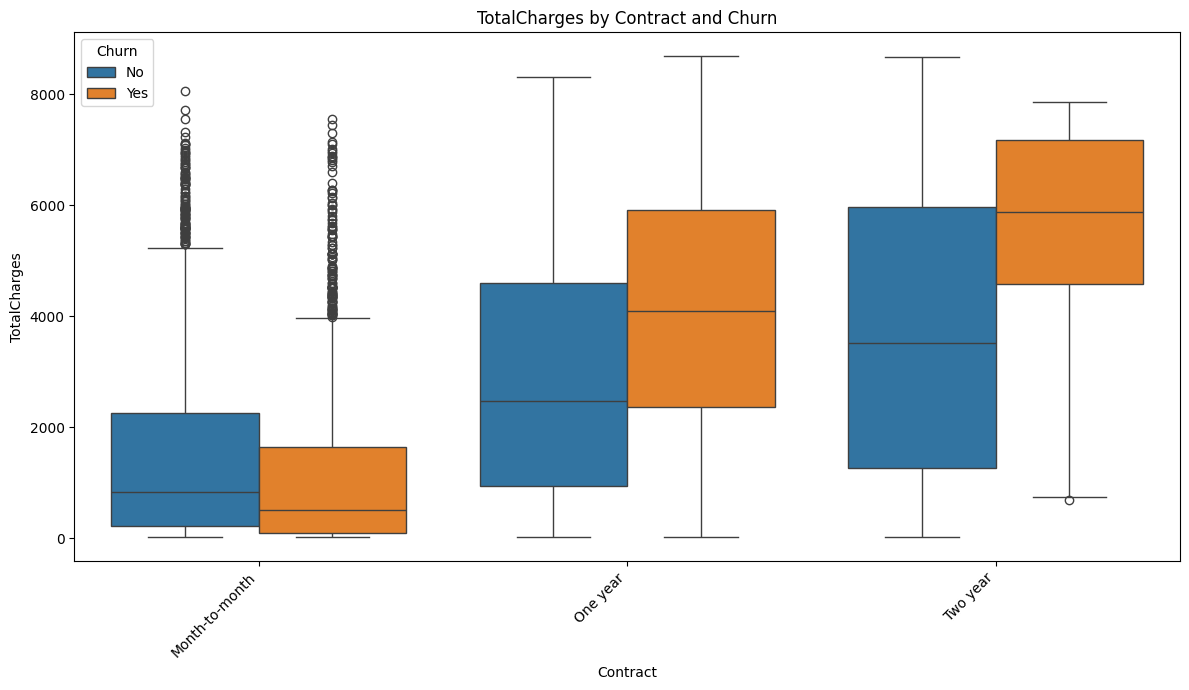

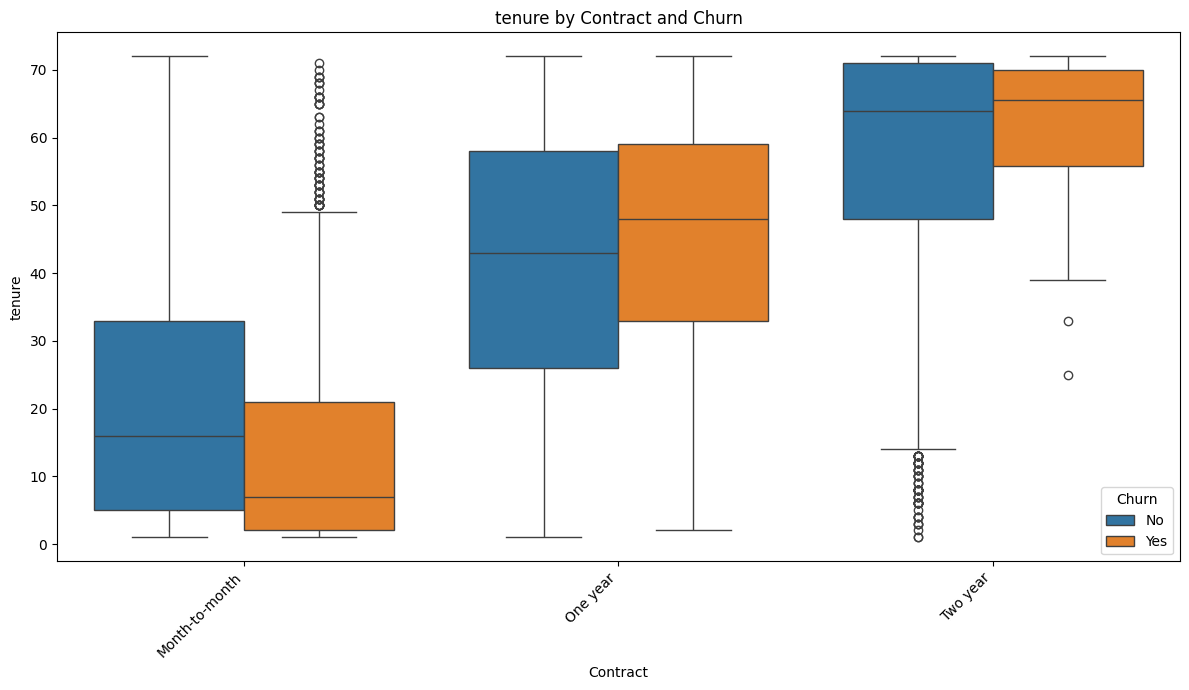

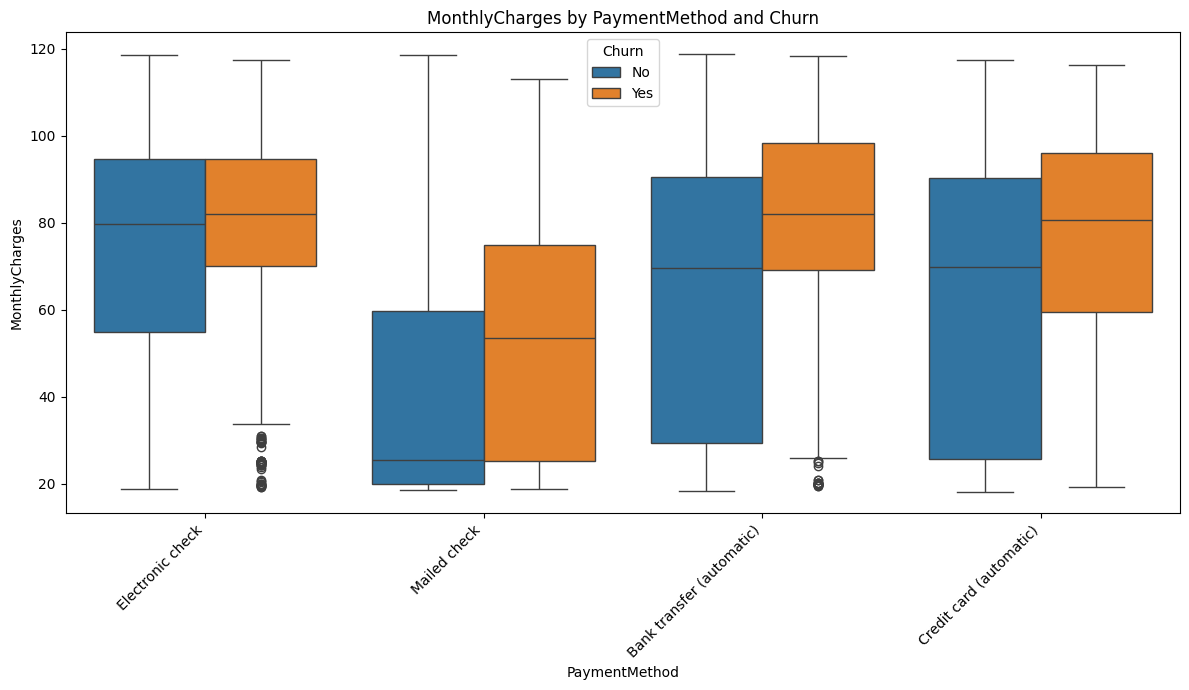

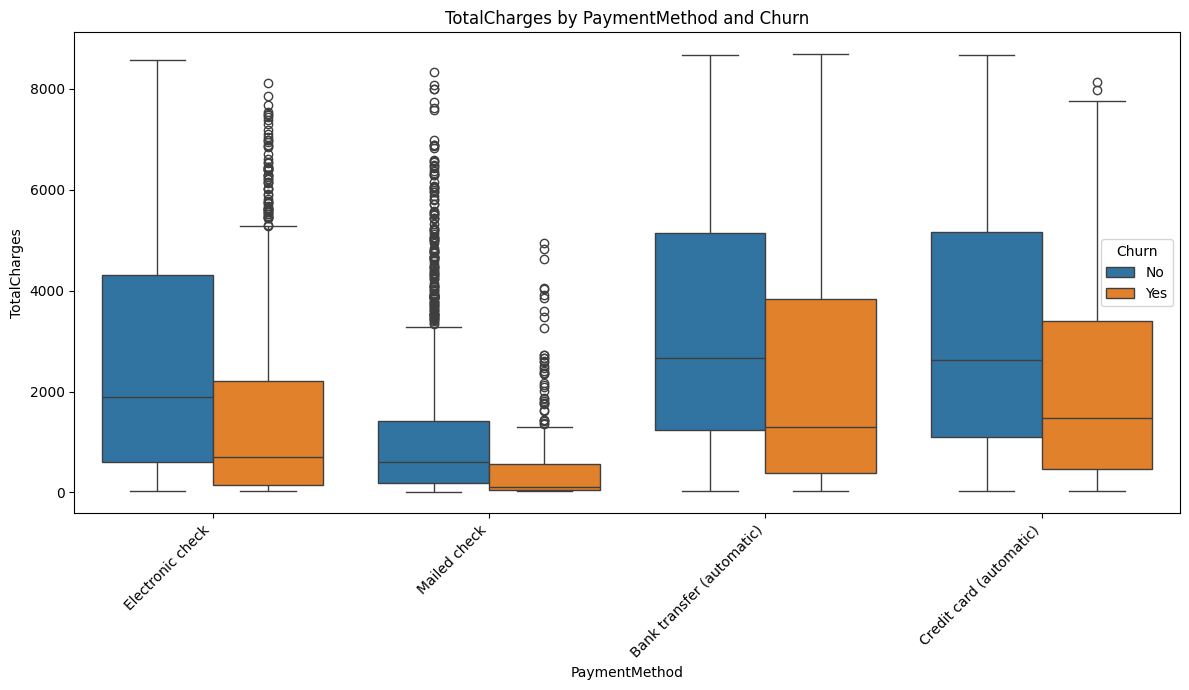

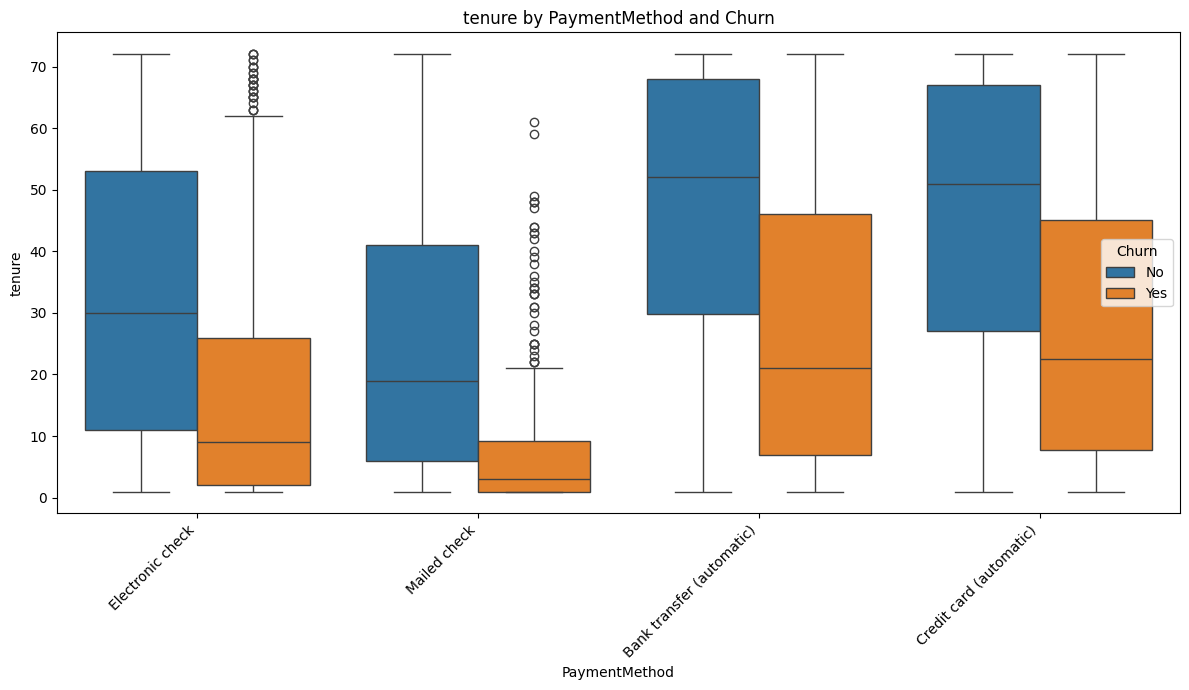

In [9]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Select a few interesting pairs for visualization
selected_categorical = ['InternetService', 'Contract', 'PaymentMethod']
selected_numerical = ['MonthlyCharges', 'TotalCharges', 'tenure']

for cat_col in selected_categorical:
    for num_col in selected_numerical:
        plt.figure(figsize=(12, 7))
        sns.boxplot(data=df, x=cat_col, y=num_col, hue='Churn')
        plt.title(f'{num_col} by {cat_col} and Churn')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## Build a churn prediction model

### Subtask:
Prepare the data and build a model to predict customer churn.


**Reasoning**:
The subtask requires preparing the data for modeling by dropping 'customerID', separating features and the target, encoding categorical variables, and splitting the data. These steps can be combined into a single code block for efficiency.



In [10]:
# 1. Drop the 'customerID' column
df_model = df.drop('customerID', axis=1)

# 2. Separate the target variable 'Churn' from the features
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# 3. Convert categorical features into numerical representations using one-hot encoding
X = pd.get_dummies(X, columns=[col for col in X.columns if X[col].dtype == 'object'], drop_first=True)

# 4. Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Import a classification model and instantiate it.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

# 6. Train the model on the training data.
model.fit(X_train, y_train)

print("Data prepared and model trained.")

Data prepared and model trained.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluate the model

### Subtask:
Assess the performance of the churn prediction model.


**Reasoning**:
Import the necessary metrics, make predictions, calculate evaluation metrics, and print them to assess the model's performance.



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Calculate ROC AUC - need probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.8031
Precision: 0.6465
Recall: 0.5722
F1-score: 0.6071
ROC AUC: 0.8364


## Interpret the results

### Subtask:
Explain the factors that contribute to customer churn based on the model and analysis.


**Reasoning**:
Examine the coefficients of the trained Logistic Regression model to understand the features contributing to churn, identify the most influential features based on coefficient magnitude and sign, and relate these findings to previous EDA to explain the factors contributing to churn.



In [12]:
# Get the coefficients and feature names from the trained model
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to easily view coefficients and their corresponding feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients to identify most influential features
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top N most influential features (e.g., top 10)
print("Top 10 Most Influential Features contributing to Churn (based on absolute coefficient magnitude):")
display(coef_df_sorted.head(10))

# Relate findings to EDA and explain factors
print("\nExplanation of key factors contributing to churn based on model coefficients and EDA:")

# Iterate through the top features and provide explanations
for index, row in coef_df_sorted.head(10).iterrows():
    feature = row['Feature']
    coefficient = row['Coefficient']

    explanation = f"- {feature}: Coefficient = {coefficient:.4f}. "

    if coefficient > 0:
        explanation += f"A higher value or presence of this feature is associated with a higher likelihood of churn. "
    else:
        explanation += f"A higher value or presence of this feature is associated with a lower likelihood of churn. "

    # Add insights from EDA if available and relevant
    if feature == 'tenure':
        explanation += "EDA showed that customers with lower tenure are more likely to churn."
    elif feature == 'MonthlyCharges':
         explanation += "EDA indicated that customers with higher monthly charges tend to churn more."
    elif feature == 'InternetService_Fiber optic':
        explanation += "EDA revealed that customers with Fiber optic internet service have a higher churn rate."
    elif feature == 'Contract_Month-to-month':
        explanation += "EDA highlighted that customers with month-to-month contracts have a significantly higher churn rate."
    elif feature == 'TotalCharges':
         explanation += "EDA showed that customers with lower total charges (often linked to lower tenure) are more likely to churn."
    elif feature == 'PaymentMethod_Electronic check':
         explanation += "EDA indicated that customers using electronic check payment method have a higher churn rate."
    elif feature == 'InternetService_No':
         explanation += "EDA showed that customers with no internet service have a lower churn rate."
    elif feature == 'Contract_Two year':
         explanation += "EDA revealed that customers with two-year contracts have a lower churn rate."
    elif feature == 'SeniorCitizen':
         explanation += "EDA showed that senior citizens have a higher churn rate."
    elif feature == 'PaperlessBilling_Yes':
        explanation += "EDA indicated that customers with paperless billing have a higher churn rate."


    print(explanation)

Top 10 Most Influential Features contributing to Churn (based on absolute coefficient magnitude):


,Feature,Coefficient,Abs_Coefficient
25,Contract_Two year,-1.356417,1.356417
24,Contract_One year,-0.748452,0.748452
10,InternetService_Fiber optic,0.689165,0.689165
13,OnlineSecurity_Yes,-0.459153,0.459153
7,PhoneService_Yes,-0.426528,0.426528
19,TechSupport_Yes,-0.419646,0.419646
28,PaymentMethod_Electronic check,0.393234,0.393234
26,PaperlessBilling_Yes,0.299733,0.299733
9,MultipleLines_Yes,0.280302,0.280302
8,MultipleLines_No phone service,0.254493,0.254493



Explanation of key factors contributing to churn based on model coefficients and EDA:
- Contract_Two year: Coefficient = -1.3564. A higher value or presence of this feature is associated with a lower likelihood of churn. EDA revealed that customers with two-year contracts have a lower churn rate.
- Contract_One year: Coefficient = -0.7485. A higher value or presence of this feature is associated with a lower likelihood of churn. 
- InternetService_Fiber optic: Coefficient = 0.6892. A higher value or presence of this feature is associated with a higher likelihood of churn. EDA revealed that customers with Fiber optic internet service have a higher churn rate.
- OnlineSecurity_Yes: Coefficient = -0.4592. A higher value or presence of this feature is associated with a lower likelihood of churn. 
- PhoneService_Yes: Coefficient = -0.4265. A higher value or presence of this feature is associated with a lower likelihood of churn. 
- TechSupport_Yes: Coefficient = -0.4196. A higher value or 

## Summary:

### Data Analysis Key Findings

*   There are no missing values in the initial dataset, except for 11 rows in the `TotalCharges` column which were successfully handled by dropping the corresponding rows.
*   The data types were mostly `object`, with `SeniorCitizen` and `tenure` as `int64`, and `MonthlyCharges` as `float64`. The `TotalCharges` column was initially `object` but was converted to `float64` during data cleaning.
*   Categorical features like `InternetService`, `Contract`, and `PaymentMethod` show distinct distributions with respect to churn.
*   Numerical features like `tenure`, `MonthlyCharges`, and `TotalCharges` have different distributions for churning and non-churning customers.
*   `TotalCharges` is strongly positively correlated with `tenure` and `MonthlyCharges` ($r > 0.8$).
*   The trained Logistic Regression model achieved an accuracy of approximately 80.31%, a precision of 64.65%, a recall of 57.22%, an F1-score of 60.71%, and an ROC AUC of 0.8364 on the test set.
*   Features with a strong positive association with churn include `InternetService_Fiber optic`, `PaymentMethod_Electronic check`, and `PaperlessBilling_Yes`.
*   Features with a strong negative association with churn (meaning they are associated with lower churn) include `Contract_Two year`, `Contract_One year`, `OnlineSecurity_Yes`, and `TechSupport_Yes`.

### Insights or Next Steps

*   Focus on retaining customers with month-to-month contracts and those using fiber optic internet or electronic check payment methods, as these segments show a higher propensity to churn.
*   Further investigate the relationship between `MonthlyCharges` and `TotalCharges` with churn, potentially by creating interaction terms or exploring non-linear relationships.
